In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model, metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/final_cleaned.csv')

In [3]:
del df['Unnamed: 0']

In [4]:
del df['Unnamed: 0.1']

In [5]:
df.shape

(9861, 24)

In [6]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    
# The function `init_classifiers` returns a list of classifiers to be trained on the datasets
def init_classifiers():
    return([(SVC(), model_names[0], param_grid_svc), 
            (LogisticRegression(), model_names[1], param_grid_logistic),
            (KNeighborsClassifier(), model_names[2], param_grid_knn),
            (GaussianNB(), model_names[3], param_grid_nb),
            (DecisionTreeClassifier(), model_names[4], param_grid_tree),
            (RandomForestClassifier(), model_names[6], param_grid_rf),
            (AdaBoostClassifier(), model_names[7], param_grid_boost)
           ])

# 'model_names' contains the names  that we will use for the above classifiers
model_names = ['SVM','LR','KNN','NB','Tree','QDA','RF','Boosting']

# the training parameters of each model
param_grid_svc = [{'C':[0.1,1],'kernel':['rbf','linear'], 'max_iter':[-1],'random_state':[1]}]
param_grid_logistic = [{'C':[0.1,1], 'penalty':['l1','l2'],'random_state':[1]}]
param_grid_knn = [{},{'n_neighbors':[1,2,3,4]}]
param_grid_nb = [{}]
param_grid_tree = [{'random_state':[1]},{'criterion':['gini'], 'max_depth':[2,3], 'min_samples_split':[3,5],'random_state':[1]}]
param_grid_rf = [{'random_state':[1]},{'n_estimators':[10,30],'max_features':[0.2, 0.3], 'bootstrap':[True],'random_state':[1]}]
param_grid_boost = [{'random_state':[1]},{'n_estimators':[10,20],'learning_rate':[0.1,1],'random_state':[1]}]

In [7]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
    
# The function `init_classifiers` returns a list of classifiers to be trained on the datasets
def init_classifiers():
    return([(SVC(), model_names[0], param_grid_svc), 
            (LogisticRegression(), model_names[1], param_grid_logistic)])

# 'model_names' contains the names  that we will use for the above classifiers
model_names = ['SVM','LR']

# the training parameters of each model
param_grid_svc = [{'C':[0.1,1],'kernel':['rbf','linear'], 'max_iter':[-1],'random_state':[1]}]
param_grid_logistic = [{'C':[0.1,1], 'penalty':['l1','l2'],'random_state':[1]}]


In [8]:
X = df.drop('y', axis= 1)
# X = X[:1000]
Y = df['y']
# Y = Y[:1000]


In [11]:
models = init_classifiers()

In [12]:
models[1][1]

'LR'

In [ ]:
for model in models:
    
#     X_train, X_test, y_train, y_test = train_test_split(X,Y)

    clf = GridSearchCV(model[0],model[2],cv = 2)

    clf.fit(X,Y)
        
    y_pred = clf.predict(X)

    print('Model ', model)
    acc = accuracy_score(Y,y_pred)
    print('Accuracy ', acc)

### Train the model using all the data, find best hyperparameter

0.718978102189781


<BarContainer object of 23 artists>

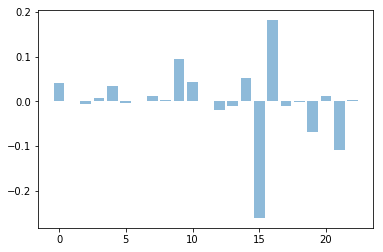

In [9]:
X = df.drop('y', axis= 1)
# X = X[:1000]
Y = df['y']
# Y = Y[:1000]

C = [0.003, 0.01,0.03, 0.1, 0.3, 1,3,10,30,100,300,1000, 3000, 10000, 30000, 100000, 300000]
best_acc = 0
best_c = None
X_train, X_test, y_train, y_test = train_test_split(X,Y)

for c in C:
        clf = linear_model.LogisticRegression(penalty='l1', C=c, 
                                                      intercept_scaling=1, 
                                                      solver='liblinear',
                                                      max_iter=1000)
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test.values)
        acc = metrics.accuracy_score(y_pred,y_test)
        
    #  only use new hyper parameter if better by thresh amount
        if(acc > best_acc):
            best_acc = acc
            best_c = c

print(best_acc)
clf = linear_model.LogisticRegression(penalty='l1', C=best_c, 
                                                  intercept_scaling=1, 
                                                  solver='liblinear',
                                                  max_iter=1000)
clf.fit(X,Y)
coef = clf.coef_[0]
pos = [x for x in range(0,len(coef))]
plt.bar(pos,coef, align='center', alpha=0.5)

### Train the model using only the 9 heighest weights from the coefficient graph above

In [10]:
positive_coef = [abs(number) for number in coef]
real_coef = positive_coef.copy()

In [11]:
positive_coef.sort()
positive_coef.reverse()

In [12]:
n = 9

top_coefs = positive_coef[:n]

col_indices = []
for num in top_coefs:
    for i,x in enumerate(real_coef):
        if x == num:
            col_indices.append(i)
col_indices

[15, 16, 21, 9, 19, 14, 10, 0, 4]

In [13]:
usecols = []
for i,col in enumerate(df.columns):
    if i in col_indices:
        usecols.append(col)
usecols.append('y')
usecols

['ExternalRiskEstimate',
 'NumSatisfactoryTrades',
 'MaxDelq2PublicRecLast12M',
 'MaxDelqEver',
 'MSinceMostRecentInqexcl7days',
 'NumInqLast6M',
 'NumInqLast6Mexcl7days',
 'NumRevolvingTradesWBalance',
 'NumBank2NatlTradesWHighUtilization',
 'y']

0.7388483373884833


<BarContainer object of 9 artists>

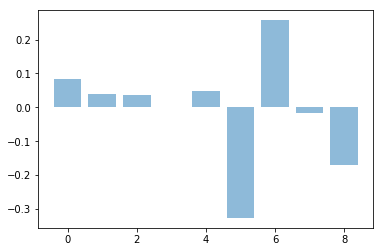

In [14]:

new_df =  df[usecols]
X = new_df.drop('y', axis= 1)
Y = new_df['y']

C = [0.003, 0.01,0.03, 0.1, 0.3, 1,3,10,30,100,300,1000, 3000, 10000, 30000, 100000, 300000]
best_acc = 0
best_c = None
X_train, X_test, y_train, y_test = train_test_split(X,Y)

for c in C:
    clf = linear_model.LogisticRegression(penalty='l1', C=c, 
                                                      intercept_scaling=1, 
                                                      solver='liblinear',
                                                      max_iter=1000)
        
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test.values)
    acc = metrics.accuracy_score(y_pred,y_test)

#  only use new hyper parameter if better by thresh amount
    if(acc > best_acc):
        best_acc = acc
        best_c = c

print(best_acc)
clf = linear_model.LogisticRegression(penalty='l1', C=best_c, 
                                                  intercept_scaling=1, 
                                                  solver='liblinear',
                                                  max_iter=1000)
clf.fit(X_train,y_train)
coef = clf.coef_[0]
pos = [x for x in range(0,len(coef))]
plt.bar(pos,coef, align='center', alpha=0.5)

In [15]:
positive_coef = [abs(number) for number in coef]
real_coef = positive_coef.copy()
positive_coef.sort()
positive_coef.reverse()
n = 7

top_coefs = positive_coef[:n]

col_indices = []
for num in top_coefs:
    for i,x in enumerate(real_coef):
        if x == num:
            col_indices.append(i)

usecols = []
for i,col in enumerate(df.columns):
    if i in col_indices:
        usecols.append(col)
usecols.append('y')
usecols

['ExternalRiskEstimate',
 'MSinceOldestTradeOpen',
 'MSinceMostRecentTradeOpen',
 'NumSatisfactoryTrades',
 'NumTrades60Ever2DerogPubRec',
 'NumTrades90Ever2DerogPubRec',
 'MSinceMostRecentDelq',
 'y']

### Retrained the model with only 7 features 

0.7335766423357665


<BarContainer object of 7 artists>

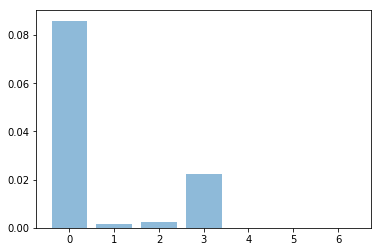

In [16]:
new_df =  df[usecols]
X = new_df.drop('y', axis= 1)
Y = new_df['y']

C = [0.003, 0.01,0.03, 0.1, 0.3, 1,3,10,30,100,300,1000, 3000, 10000, 30000, 100000, 300000]
best_acc = 0
best_c = None
X_train, X_test, y_train, y_test = train_test_split(X,Y)

for c in C:
        clf = linear_model.LogisticRegression(penalty='l1', C=c, 
                                                      intercept_scaling=1, 
                                                      solver='liblinear',
                                                      max_iter=1000)
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test.values)
        acc = metrics.accuracy_score(y_pred,y_test)
        
    #  only use new hyper parameter if better by thresh amount
        if(acc > best_acc):
            best_acc = acc
            best_c = c

print(best_acc)
clf = linear_model.LogisticRegression(penalty='l1', C=best_c, 
                                                  intercept_scaling=1, 
                                                  solver='liblinear',
                                                  max_iter=1000)
clf.fit(X_train,y_train)
coef = clf.coef_[0]
pos = [x for x in range(0,len(coef))]
plt.bar(pos,coef, align='center', alpha=0.5)

### Uses sklearns built in method to select features and retrain model to find performance

In [23]:
from sklearn.feature_selection import SelectKBest, f_regression

X = df.drop('y', axis= 1)
Y = df['y']

selector = SelectKBest(f_regression, k=9)
selector.fit(X, Y)
# Get columns to keep
cols = selector.get_support(indices=True)

In [24]:
sklearn_cols = []
for col in cols:
    sklearn_cols.append(df.columns[col])
sklearn_cols.append('y')

0.7222222222222222


<BarContainer object of 9 artists>

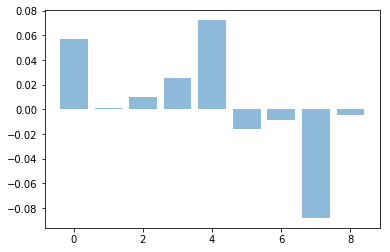

In [25]:
new_df =  df[sklearn_cols]
X = new_df.drop('y', axis= 1)
# X = X[:1000]
Y = new_df['y']
# Y = Y[:1000]

C = [0.003, 0.01,0.03, 0.1, 0.3, 1,3,10,30,100,300,1000, 3000, 10000, 30000, 100000, 300000]
best_acc = 0
best_c = None
X_train, X_test, y_train, y_test = train_test_split(X,Y)

for c in C:
        clf = linear_model.LogisticRegression(penalty='l1', C=c, 
                                                      intercept_scaling=1, 
                                                      solver='liblinear',
                                                      max_iter=1000)
        
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test.values)
        acc = metrics.accuracy_score(y_pred,y_test)
        
    #  only use new hyper parameter if better by thresh amount
        if(acc > best_acc):
            best_acc = acc
            best_c = c

print(best_acc)
clf = linear_model.LogisticRegression(penalty='l1', C=best_c, 
                                                  intercept_scaling=1, 
                                                  solver='liblinear',
                                                  max_iter=1000)
clf.fit(X_train,y_train)
coef = clf.coef_[0]
pos = [x for x in range(0,len(coef))]
plt.bar(pos,coef, align='center', alpha=0.5)